<a id="1"></a>
# <p style="background-color:#0286ba;font-family:georgia,serif;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">Southern US Housing Market</p>

___

<div style="text-align: center;">
  <img src="https://github.com/WillyWill143/Southern-housing-market/blob/main/housing%20pic2.jpg?raw=true" alt="Housing Image" width="500">
</div>

___

## Notebook Goals:
### First: 
* Conduct an EDA about the US southern states and their Real Estate Market, and use Visualizations to display information.
* Clean the data and process it.
### Second:
#### Answer the following questions:
* What is the distribution of listing prices in each state?
* What are the average, median, and range of prices in Texas, Tennessee, Arkansas, Louisiana, Alabama, and Mississippi?
* Which state shows the highest median price?
* Are there significant differences in value relative to living area?
* Is there a relationship between lot area (value and unit) and the listing price?
* How do bedrooms and bathrooms correlate with price and living area?
* What is the distribution of living area sizes (in sqft) per state?
* Is there a relationship between price and the number of days on Zillow?
* Which brokers are most common in each state?
* map the listings (using latitude and longitude) to reveal clusters of high or low-priced properties?
* Are there differences in market dynamics (e.g., price per sqft, days on market) between urban versus rural areas within these states?
* How do combinations of features (like high living area with many bedrooms) affect the price?

### Design:
*The notebook consists of code to conduct analysis then notes or observations made after the code to showcase the findings, and then a comprehensive observations or insights section at the end of it!*

---

<a id="1"></a>
# <p style="background-color:#0286ba;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Imports and cleaning</p>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
palette_1 = ["royalblue", "lightsteelblue", "slategrey", "cornflowerblue", "lavender"]
palette_2 = ["darkcyan", "darkturquoise", "cadetblue", "powderblue", "cyan"]
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import re
from scipy.stats import trim_mean
import warnings
warnings.filterwarnings("ignore")

#### Note that this dataset was made on the 27th of March 2025

In [64]:
data = pd.read_csv("/kaggle/input/southern-states-zillow-data/zillow_listings.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          5899 non-null   object 
 1   address        5904 non-null   object 
 2   addressStreet  5904 non-null   object 
 3   zipcode        5904 non-null   int64  
 4   city           5904 non-null   object 
 5   state          5904 non-null   object 
 6   latitude       5900 non-null   float64
 7   longitude      5900 non-null   float64
 8   bathrooms      5866 non-null   float64
 9   bedrooms       5862 non-null   float64
 10  livingArea     5788 non-null   float64
 11  homeType       5904 non-null   object 
 12  homeStatus     5904 non-null   object 
 13  daysOnZillow   5904 non-null   int64  
 14  isFeatured     5904 non-null   bool   
 15  timeOnZillow   5904 non-null   int64  
 16  isZillowOwned  5904 non-null   bool   
 17  brokerName     4385 non-null   object 
 18  lotAreaV

In [65]:
data.head()

,price,address,addressStreet,zipcode,city,state,latitude,longitude,bathrooms,bedrooms,livingArea,homeType,homeStatus,daysOnZillow,isFeatured,timeOnZillow,isZillowOwned,brokerName,lotAreaValue,lotAreaUnit
0,"$398,900","181 Lakeview Trl, McMinnville, TN 37110",181 Lakeview Trl,37110,McMinnville,TN,35.696360,-85.823540,3.0,3.0,2756.0,SINGLE_FAMILY,FOR_SALE,1,False,138767000,False,NaN,2.00,acres
1,"$650,000","151 John D St, La Vergne, TN 37086",151 John D St,37086,La Vergne,TN,35.997270,-86.567730,4.0,4.0,3999.0,SINGLE_FAMILY,FOR_SALE,1,False,89395000,False,NaN,0.46,acres
2,"$419,995","3336 Quail Run Ct, Nashville, TN 37214",3336 Quail Run Ct,37214,Nashville,TN,36.135098,-86.633286,4.0,3.0,2329.0,SINGLE_FAMILY,FOR_SALE,0,False,52367000,False,NaN,0.31,acres
3,"$4,100,000","1772 Lockertsville Rd, Ashland City, TN 37015",1772 Lockertsville Rd,37015,Ashland City,TN,36.330610,-87.095604,5.0,5.0,7901.0,SINGLE_FAMILY,FOR_SALE,4,False,397967000,False,NaN,46.01,acres
4,"$999,999","2123 Jc Taber Ln, Murfreesboro, TN 37130",2123 Jc Taber Ln,37130,Murfreesboro,TN,35.875940,-86.345085,4.0,5.0,3454.0,SINGLE_FAMILY,FOR_SALE,6,False,570767000,False,NaN,5.17,acres


In [66]:
# feature engineer the price column
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[\$,+]', '', price)
        if "k" in price or "K" in price:
            price = float(price.replace("k", "").replace("K", "")) * 1000
        else:
            price = float(price)
    return price

data["price"] = data["price"].apply(clean_price)

In [67]:
data.describe()

,price,zipcode,latitude,longitude,bathrooms,bedrooms,livingArea,daysOnZillow,timeOnZillow,lotAreaValue
count,5.899000e+03,5904.000000,5900.000000,5900.000000,5866.000000,5862.000000,5.788000e+03,5904.000000,5.904000e+03,5.741000e+03
mean,5.303234e+05,55457.886009,32.980717,-90.633235,2.710450,3.525589,5.357126e+03,36.923272,3.231072e+09,1.763511e+05
std,1.735251e+06,18025.997856,2.327601,4.088032,1.381244,1.045433,2.271291e+05,77.197765,6.672621e+09,1.319791e+07
min,0.000000e+00,35004.000000,26.013777,-106.615290,0.000000,0.000000,0.000000e+00,0.000000,1.330000e+05,0.000000e+00
25%,2.120000e+05,37415.000000,30.497331,-93.211740,2.000000,3.000000,1.543000e+03,1.000000,1.058065e+08,4.800000e-01
50%,3.000000e+05,54887.000000,32.940008,-90.110775,2.000000,3.000000,2.015000e+03,6.000000,5.872410e+08,2.000000e+00
75%,4.450000e+05,72223.000000,35.090619,-87.198986,3.000000,4.000000,2.668000e+03,35.000000,3.097763e+09,4.791600e+03
max,6.400000e+07,79938.000000,36.640717,-81.748990,36.000000,25.000000,1.728159e+07,1378.000000,1.190700e+11,1.000000e+09


In [68]:
columns = data.columns
for i in columns:
    if data[i].dtype == 'object':  
        unique_values = np.unique(data[i].astype(str))  
        if len(unique_values) < 10:  
            print(f"{i} unique values are {unique_values}")

state unique values are ['AL' 'AR' 'LA' 'MS' 'TN' 'TX']
homeType unique values are ['CONDO' 'LOT' 'MANUFACTURED' 'MULTI_FAMILY' 'SINGLE_FAMILY' 'TOWNHOUSE']
homeStatus unique values are ['FOR_SALE']
lotAreaUnit unique values are ['acres' 'nan' 'sqft']


---

### Cleaning TO-DO:
1. Fix the price column and turn it into a float data type. *DONE*
2. Make the Lot Area Unit consistent (convert in sqft) to match the living Area. *DONE*
3. Deal with NAN values. *DONE*
4. Investigate the outliers in bedrooms Max = (25) and bathrooms Max = (36). *DONE*

---

In [69]:
# convert to sqft
def convert_to_sqft(row):
    if row['lotAreaUnit'] == 'acres':
        # Convert acres to square feet (1 acre = 43560 sqft)
        return row['lotAreaValue'] * 43560
    else:
        return row['lotAreaValue']

data['lotArea_sqft'] = data.apply(convert_to_sqft, axis=1)

In [70]:
# investigating extreme outliers
extreme_baths = data.loc[data['bathrooms'] >= 25]
extreme_beds = data.loc[data['bedrooms'] == 25]
extreme_baths

,price,address,addressStreet,zipcode,city,state,latitude,longitude,bathrooms,bedrooms,...,homeType,homeStatus,daysOnZillow,isFeatured,timeOnZillow,isZillowOwned,brokerName,lotAreaValue,lotAreaUnit,lotArea_sqft
1547,11000000.0,"19525 Doerre Rd, Spring, TX 77379",19525 Doerre Rd,77379,Spring,TX,30.059366,-95.53675,36.0,15.0,...,SINGLE_FAMILY,FOR_SALE,6,False,541315000,False,First Class Realtors,9.8225,acres,427868.1


In [71]:
extreme_beds

,price,address,addressStreet,zipcode,city,state,latitude,longitude,bathrooms,bedrooms,...,homeType,homeStatus,daysOnZillow,isFeatured,timeOnZillow,isZillowOwned,brokerName,lotAreaValue,lotAreaUnit,lotArea_sqft
804,4450000.0,"7100 Dulaney Way, Knoxville, TN 37919",7100 Dulaney Way,37919,Knoxville,TN,35.909733,-84.01069,22.0,25.0,...,MULTI_FAMILY,FOR_SALE,0,False,22399000,False,SVN I Wood Properties,NaN,NaN,NaN
1746,39900000.0,"5055 Wayside Drive, Wimberley, TX 78676",5055 Wayside Drive,78676,Wimberley,TX,29.966763,-98.18544,20.0,25.0,...,LOT,FOR_SALE,26,False,2331159000,False,Keller Williams Realty,538.0,acres,23435280.0


#### Notes:
* I looked up the Listings on Zillow, so all the outliers actually exist, they're just extremely large houses 

In [72]:
# display the number of missing values 
def missing_values(df):
    missings = df.isnull().sum()
    summary_df = missings.to_frame('MissingValues')\
                               .reset_index()\
                               .rename(columns={'index': 'Column'})
    return summary_df

missing_values(data)

,Column,MissingValues
0,price,5
1,address,0
2,addressStreet,0
3,zipcode,0
4,city,0
5,state,0
6,latitude,4
7,longitude,4
8,bathrooms,38
9,bedrooms,42


In [73]:
beds_nans = data.loc[data['bathrooms'].isnull()]

#### Notes:
* Listings that have missing bathrooms or bedrooms ar either just land or farmland in development, so i will fix it by replacing NANs with 0s.
* Listings that have missing living area, the value was just not written so there is no other way to fix it except deleting the rows.
* Listings with missing lot Area Value or Unit are mostly Condos and they actually don't have a lot area so i will fix it by replacing the NANs with 0s and "unknown".
* For the Broker name i will replace the NANs with 'independent' as in independent seller.
* And just delete the Lat and Long NANs.
* As for price i will keep that NANs because i will use the data later for Machine Learning so i'll split it either way.

In [74]:
# dealing with missin values
def clean_nans(df):
    df = df.copy()
    
    df['bathrooms'] = df['bathrooms'].fillna(0)
    df['bedrooms'] = df['bedrooms'].fillna(0)
    df = df.dropna(subset=['livingArea'])
    # Delete the row with the maximum living area value
    max_livingArea = df['livingArea'].idxmax()
    df = df.drop(max_livingArea)
    # Delete the row with max lot area
    max_lotArea = df['lotAreaValue'].idxmax()
    df = df.drop(max_lotArea)
    # delete the row with max lot area in sqft
    max_lotSqft = df['lotArea_sqft'].idxmax()
    df = df.drop(max_lotSqft)
    # delete the row with max price
    max_price = df['price'].idxmax()
    df = df.drop(max_price)
    df['lotAreaValue'] = df['lotAreaValue'].fillna(0)
    df['lotAreaUnit'] = df['lotAreaUnit'].fillna("unknown")
    df['lotArea_sqft'] = df['lotArea_sqft'].fillna(0)
    df['brokerName'] = df['brokerName'].fillna('independent')
    df = df.dropna(subset=['latitude', 'longitude'])
    
    return df
    
new_data = clean_nans(data)

<a id="1"></a>
# <p style="background-color:#0286ba;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Answering Questions</p>

#### <span style="color:#1E90FF">What is the distribution of listing prices in each state?</span>

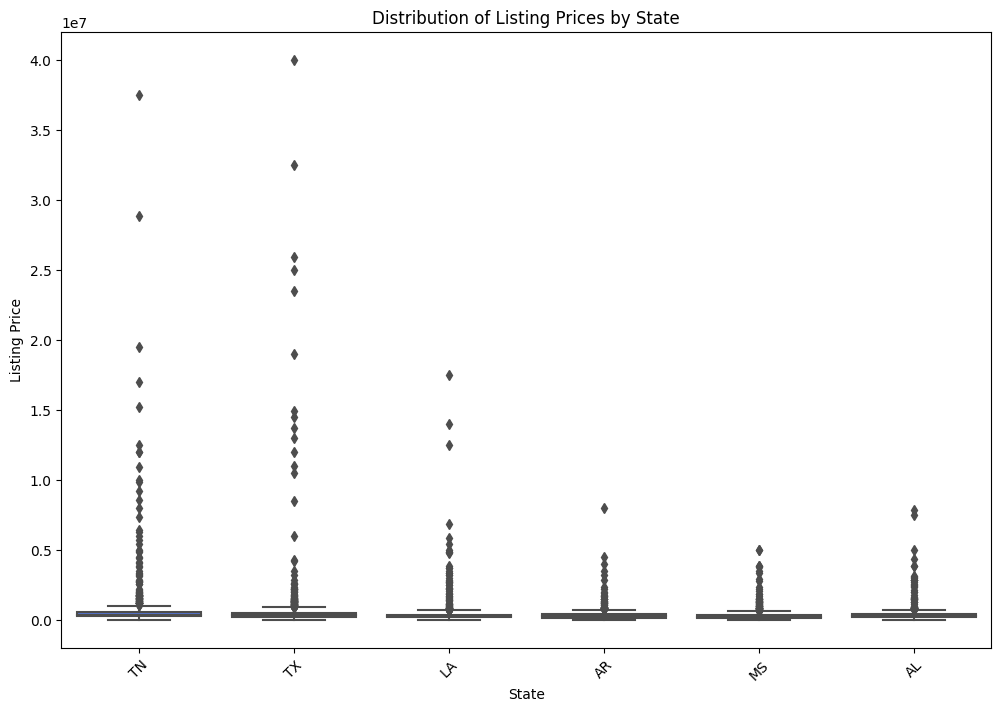

In [75]:
# What is the distribution of listing prices in each state?
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='price', data= new_data, palette = palette_1)
plt.xticks(rotation=45)
plt.title('Distribution of Listing Prices by State')
plt.xlabel('State')
plt.ylabel('Listing Price')
plt.show()

---

##### So the BoxPlot is not showing any useful information because of the  existence of outliers, so i will deal with this issue using two methods!

---
### Methods:
1. IQR Method:
    * It removes extreme values based on statistical bounds (values below Q1 - 1.5·IQR or above Q3 + 1.5·IQR). This can simplify visualizations and   analyses by excluding points that may skew overall metrics.
2. Log Transformation:
    * It compresses the scale of the data, especially at the high end, which reduces the influence of extreme values without removing them. This often results in a more symmetric distribution.
---

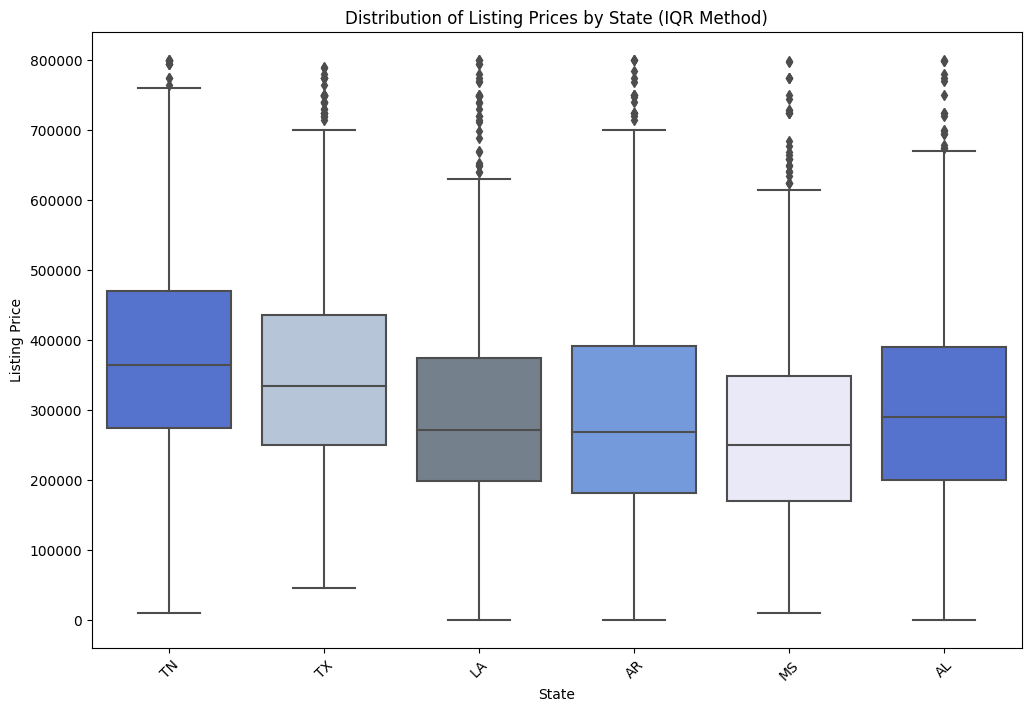

In [76]:
# IQR Method
Q1 = new_data['price'].quantile(0.25)
Q3 = new_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = new_data[(new_data['price'] >= lower_bound) & (new_data['price'] <= upper_bound)]

# Plot without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='price', data=df_no_outliers, palette= palette_1)
plt.xticks(rotation=45)
plt.title('Distribution of Listing Prices by State (IQR Method)')
plt.xlabel('State')
plt.ylabel('Listing Price')
plt.show()

In [77]:
# Calculate skewness to see if i should use the second method which is "log transformation"
skewness_value = new_data['price'].skew()
print("Skewness of price:", skewness_value)

Skewness of price: 15.287773589416329


In [78]:
# adjusting skewness using log transformations
new_data['log_price'] = np.log(new_data['price'] + 1000)

# Calculate and print skewness of the log-transformed price
log_skewness_value = new_data['log_price'].skew()
print("Skewness of log-transformed price:", log_skewness_value)

Skewness of log-transformed price: -0.1881461458725502


---
*After trying out many transformation constants (the 1000 i added), i achieved the best skewness value being (-0.18),
so now we'll plot the data again to see if the two methods return similar results regarding the distribtution of the price data.*

---

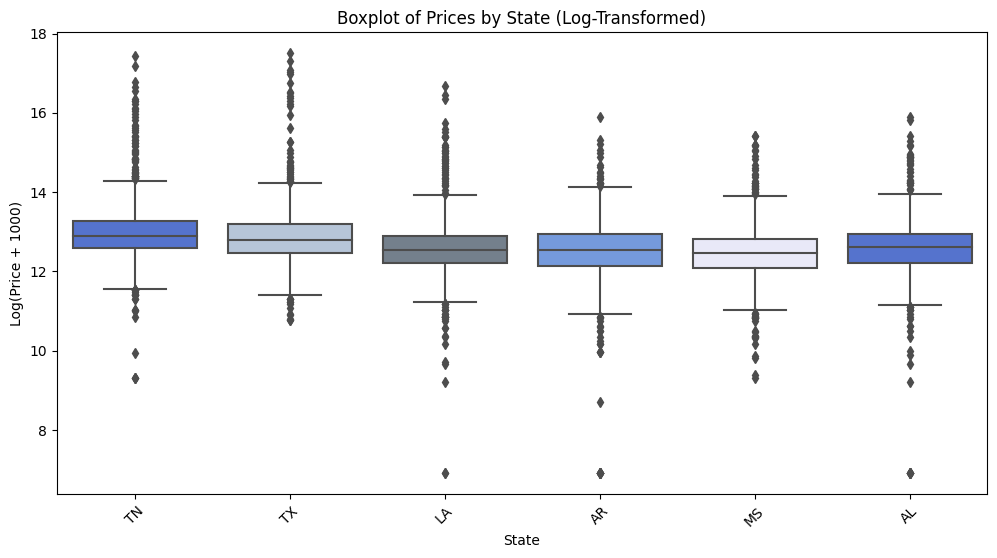

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='log_price', data=new_data, palette= palette_1)
plt.title("Boxplot of Prices by State (Log-Transformed)")
plt.xlabel("State")
plt.ylabel("Log(Price + 1000)")
plt.xticks(rotation=45)
plt.show()

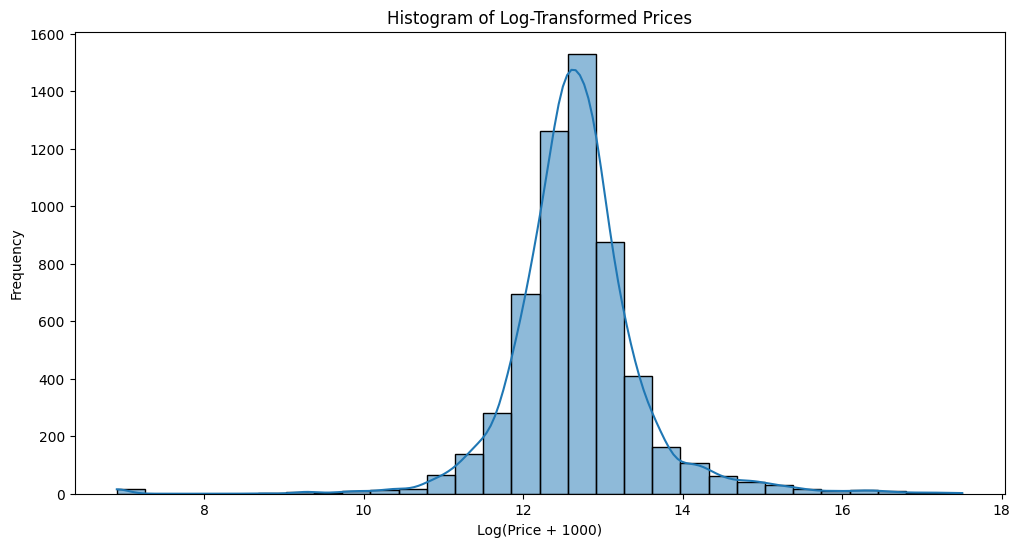

In [80]:
# Plotting a histogram of the log-transformed prices
plt.figure(figsize=(12, 6))
sns.histplot(new_data['log_price'], bins=30, kde=True, palette= palette_2)
plt.title("Histogram of Log-Transformed Prices")
plt.xlabel("Log(Price + 1000)")
plt.ylabel("Frequency")
plt.show()

#### <span style="color:#1E90FF">What is the most common property price?</span>

In [81]:
# most common property price
most_common_prices = new_data['price'].mode()
print("Most common house price(s):", most_common_prices.tolist())

Most common house price(s): [250000.0]


#### <span style="color:#1E90FF">What are the average, median, range of prices, and mode in every state?</span>

In [82]:
# Calculate summary statistics for each state, including a trimmed mean (removing 10% from each tail).
summary_stats = new_data.groupby('state')['price'].agg(
    trimmed_mean=lambda x: trim_mean(x, 0.1),
    median='median',
    price_range=lambda x: x.max() - x.min(),
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

print("Summary Statistics for Each State:")
summary_stats

Summary Statistics for Each State:


,state,trimmed_mean,median,price_range,mode
0,AL,313632.215561,299000.0,7900000.0,325000.0
1,AR,299556.787840,275000.0,7999999.0,275000.0
2,LA,305075.607868,280000.0,17499999.0,215000.0
3,MS,273470.483787,260000.0,4990000.0,265000.0
4,TN,447964.659371,399000.0,37490000.0,299900.0
5,TX,397949.925926,359950.0,39953700.0,250000.0


#### <span style="color:#1E90FF">Which state shows the highest median price?</span>

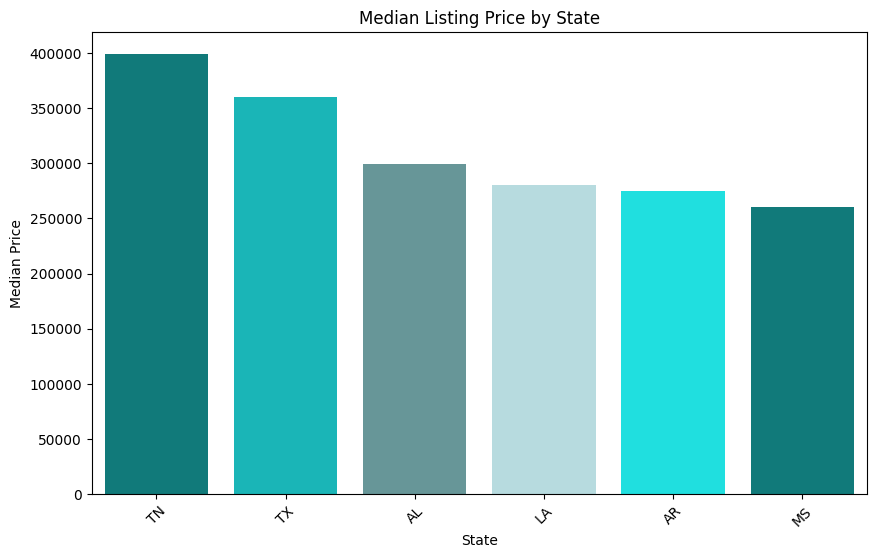

In [83]:
# Which state shows the highest median price?
median_prices = new_data.groupby('state')['price'].median().reset_index()

median_prices = median_prices.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=median_prices, x='state', y='price', palette= palette_2)
plt.title("Median Listing Price by State")
plt.xlabel("State")
plt.ylabel("Median Price")
plt.xticks(rotation=45)
plt.show()

### Observations:
* So we can see that both methods output the same results, with the same differences in price distributions in for every state.
* Tennessee has the highest Median out of all states, which suggests that the pricing levels for TN is higher than any other state.
* The states with the highest average for property prices are Tennessee and Texas, with Texas having the most expensive properties ever, and a wider range of prices.
* Louisiana, Arkansas, and Mississippi having the lowest average of property prices, with Arkansas having a wider range or a more diverse range of prices than other states.
* And the most common property price in all states is $250,000.

*Bottom Line:* if you want cheap houses, go to LA or MS, if you don't care about money and you like luxury then go to Texas, if you like normal-priced property and Farmland then go to Alabama or Arkansas, and if you just wanna pay more then go to Tennessee!

------

#### <span style="color:#1E90FF">Are there significant differences in value relative to living area?</span>

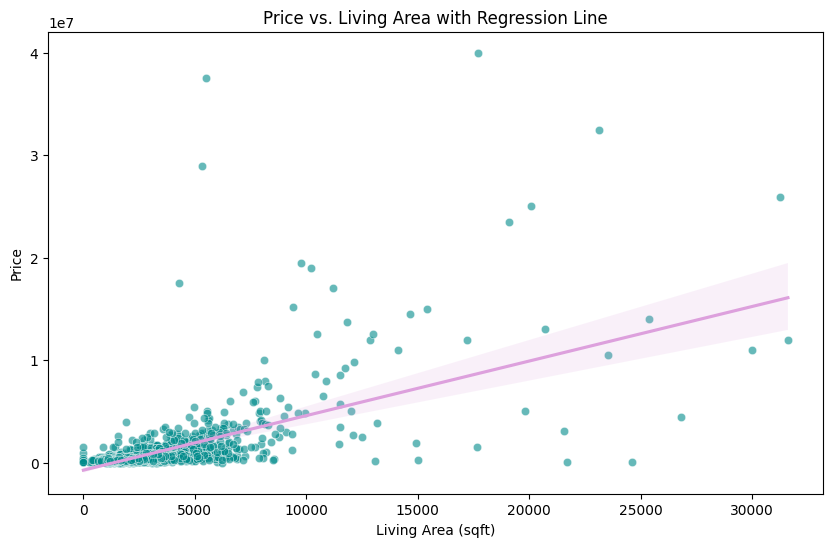

In [84]:
# relationship between Price and Living area
plt.figure(figsize=(10,6))
sns.scatterplot(x='livingArea', y='price', data=new_data, alpha=0.6, color= "darkcyan")
sns.regplot(x='livingArea', y='price', data=new_data, scatter=False, color='plum')
plt.title("Price vs. Living Area with Regression Line")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.show()

#### <span style="color:#1E90FF">Is there a relationship between lot area (value and unit) and the listing price?</span>

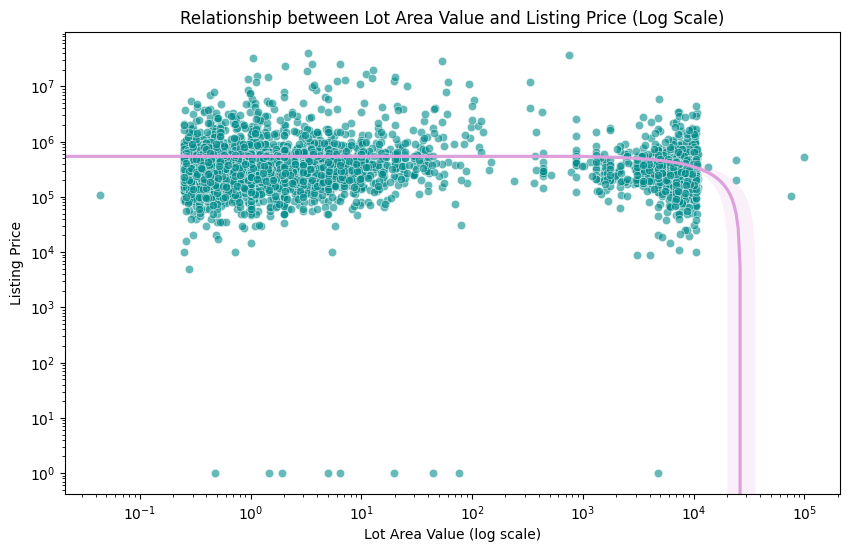

In [85]:
# Relationship between Price and Lot Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lotAreaValue', y='price', data=new_data, alpha=0.6, color= "darkcyan")
sns.regplot(x='lotAreaValue', y='price', data=new_data, scatter=False, color='plum')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')
plt.title("Relationship between Lot Area Value and Listing Price (Log Scale)")
plt.xlabel("Lot Area Value (log scale)")
plt.ylabel("Listing Price")
plt.show()

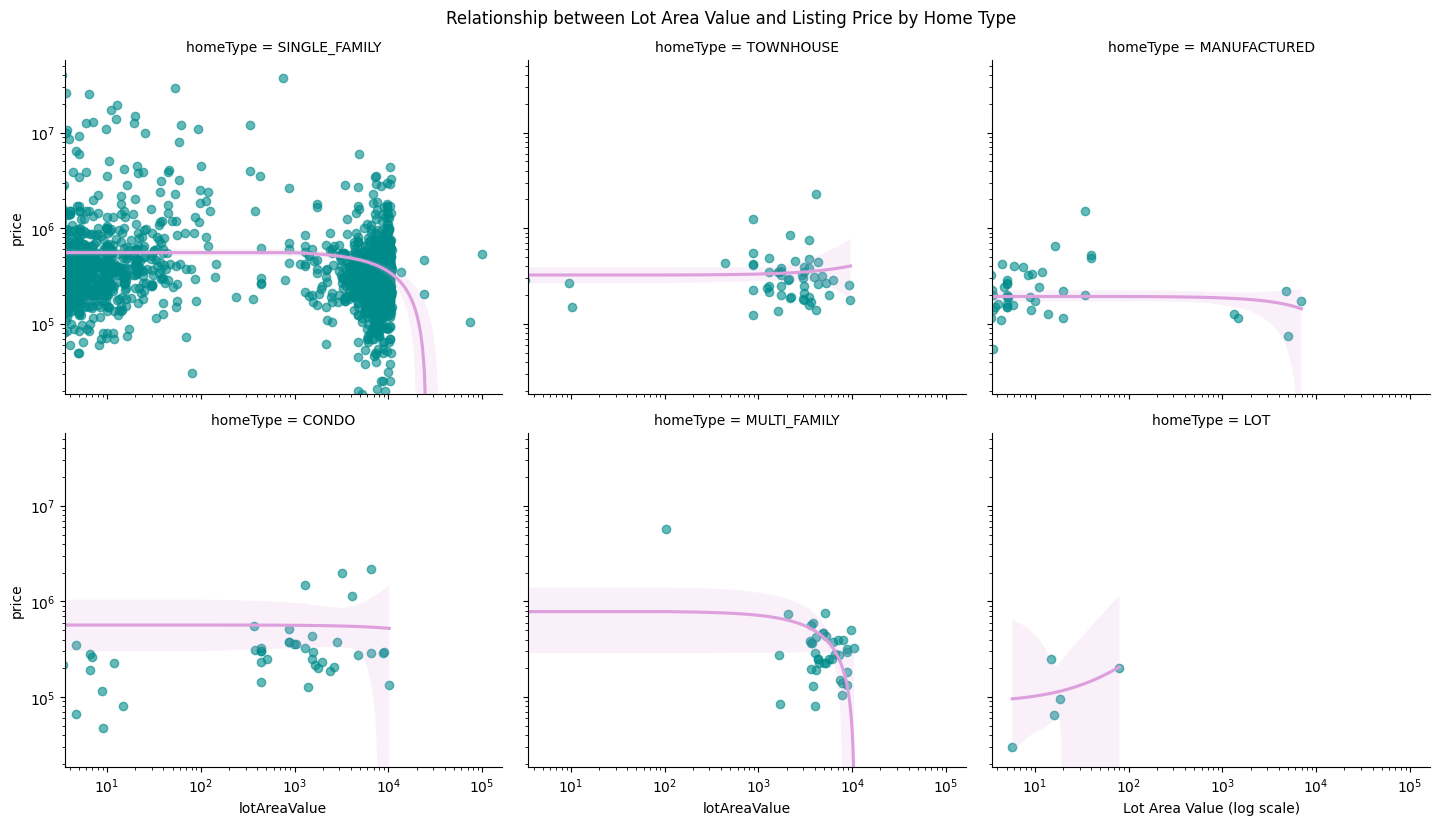

In [86]:
sns.lmplot(
    x='lotAreaValue', 
    y='price', 
    col='homeType', 
    data=new_data, 
    col_wrap=3, 
    scatter_kws={'alpha': 0.6, 'color': 'darkcyan'},
    line_kws={'color': 'plum'},
    height=4, 
    aspect=1.2
)
plt.xscale('log')  # Apply log scale to the x-axis for each facet
plt.yscale('log')
plt.suptitle("Relationship between Lot Area Value and Listing Price by Home Type", y=1.02)
plt.xlabel("Lot Area Value (log scale)")
plt.ylabel("Listing Price")
plt.show()

#### <span style="color:#1E90FF">How do bathrooms and bedrooms correlate with price and living area?</span>

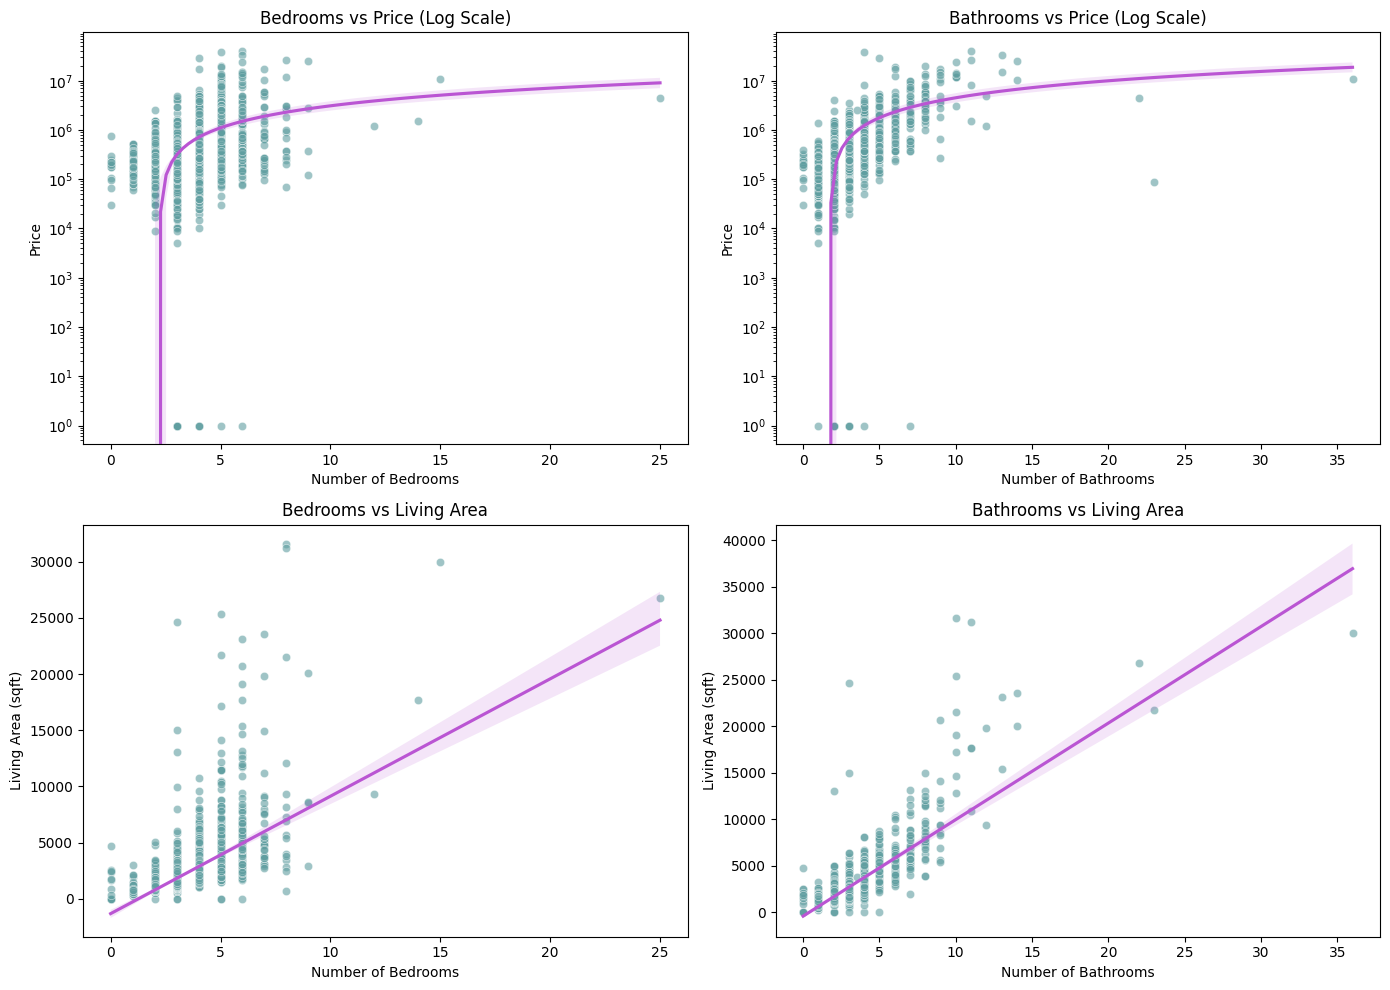

In [87]:
# How do bathrooms and bedrooms correlate with price and living area
plt.figure(figsize=(14, 10))

# Bedrooms vs Price (Log Scale)
plt.subplot(2, 2, 1)
sns.scatterplot(x='bedrooms', y='price', data=new_data, alpha=0.6, color= "cadetblue")
sns.regplot(x='bedrooms', y='price', data=new_data, scatter=False, color='mediumorchid')
plt.yscale('log')
plt.title("Bedrooms vs Price (Log Scale)")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")

# Bathrooms vs Price (Log Scale)
plt.subplot(2, 2, 2)
sns.scatterplot(x='bathrooms', y='price', data=new_data, alpha=0.6, color= "cadetblue")
sns.regplot(x='bathrooms', y='price', data=new_data, scatter=False, color='mediumorchid')
plt.yscale('log')
plt.title("Bathrooms vs Price (Log Scale)")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")

# Bedrooms vs Living Area
plt.subplot(2, 2, 3)
sns.scatterplot(x='bedrooms', y='livingArea', data=new_data, alpha=0.6, color= "cadetblue")
sns.regplot(x='bedrooms', y='livingArea', data=new_data, scatter=False, color='mediumorchid')
plt.title("Bedrooms vs Living Area")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Living Area (sqft)")

# Bathrooms vs Living Area
plt.subplot(2, 2, 4)
sns.scatterplot(x='bathrooms', y='livingArea', data=new_data, alpha=0.6, color= "cadetblue")
sns.regplot(x='bathrooms', y='livingArea', data=new_data, scatter=False, color='mediumorchid')
plt.title("Bathrooms vs Living Area")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Living Area (sqft)")

plt.tight_layout()
plt.show()

---
### Observations:
* So apparently the higher the value of the living area the higher the price.
* And there is no relationship whatsoever between the price of the property and the Lot area even across all Property Segments.

* For bedrooms against price, the value of the property increases when we increase the number of beds until we reach 5 beds, then having more bedrooms doesn't contribute much to the price.
* For bathrooms agianst price, the value of the property also increases when we increase the number of bathrooms until we reach 6 or 7 baths, then having more bathrooms becomes less relevant to the price.
* We can also clearly see the more bedrooms requires more living Area, and the same thing with bathrooms!

---

#### <span style="color:#1E90FF">What is the distribution of living area sizes (in sqft) per state?</span>

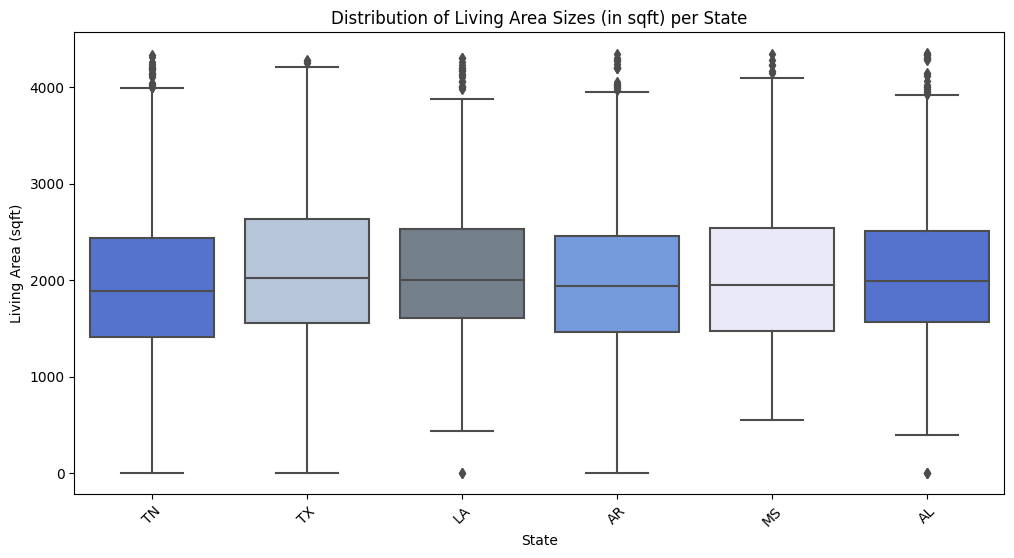

In [88]:
# the distrubtion of living area per state 
Q1 = new_data['livingArea'].quantile(0.25)
Q3 = new_data['livingArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trim the dataset by filtering out outliers in livingArea
df_trimmed = new_data[(new_data['livingArea'] >= lower_bound) & (new_data['livingArea'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='livingArea', data=df_trimmed, palette= palette_1)
plt.title("Distribution of Living Area Sizes (in sqft) per State")
plt.xlabel("State")
plt.ylabel("Living Area (sqft)")
plt.xticks(rotation=45)
plt.show()

In [89]:
# Calculate summary statistics for each state regarding living area.
summary_stats2 = new_data.groupby('state')['livingArea'].agg(
    average_area=lambda x: trim_mean(x, 0.1),
    median='median',
    area_range=lambda x: x.max() - x.min(),
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

print("Summary Statistics for Each State regarding living area:")
summary_stats2

Summary Statistics for Each State regarding living area:


,state,average_area,median,area_range,mode
0,AL,2121.568878,2029.5,21554.0,1800.0
1,AR,2043.868047,1988.0,24600.0,2100.0
2,LA,2155.064721,2061.0,25372.0,1500.0
3,MS,2100.461738,1986.0,19250.0,2200.0
4,TN,2061.164159,1950.0,31600.0,1200.0
5,TX,2198.208174,2100.0,31234.0,1344.0


---
### Obseravtions:
* The state that has relatively the biggest properties is Texas, followed by Louisiana. but the interesting part is that prices for Lousiana are much cheaper even when it has relatively the same living areas value as Texas!
* The states with the lowest value for living area are Arkansas, followed by Tennessee, and it is also worth noting the their average prices are neither at the top or the bottom.
* The states that have more smaller properties than the other (or generally a wider range) are Texas and Tennessee.

---

#### <span style="color:#1E90FF">Is there a relationship between price and number of days on Zillow?</span>

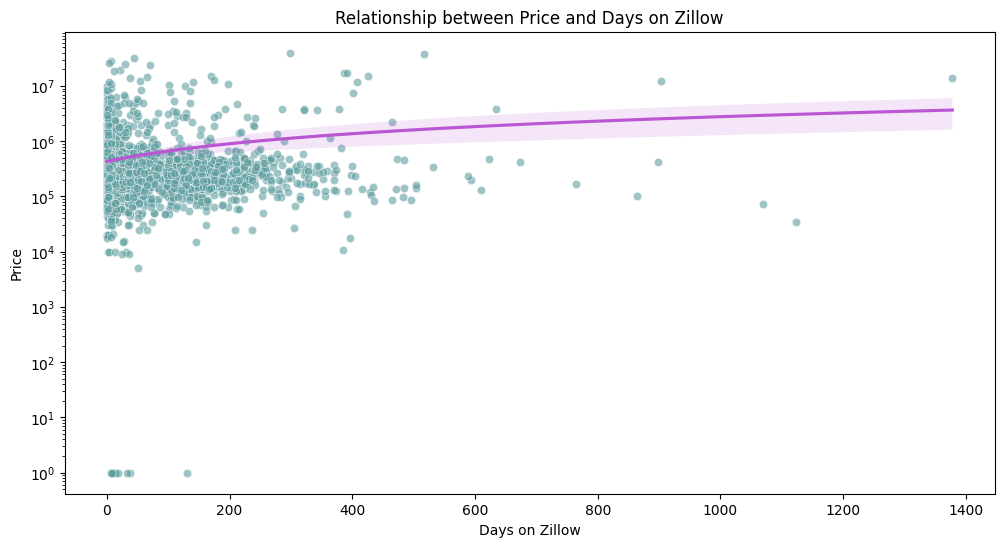

In [90]:
# is there a relationship between price and number of days on Zillow
plt.figure(figsize=(12, 6))
sns.scatterplot(x='daysOnZillow', y='price', data=new_data, alpha=0.6, color= "cadetblue")
sns.regplot(x='daysOnZillow', y='price', data=new_data, scatter=False, color='mediumorchid')
plt.title("Relationship between Price and Days on Zillow")
plt.xlabel("Days on Zillow")
plt.ylabel("Price")
plt.yscale('log')
plt.show()

---
##### We can see that there is no relationship between those two features!

---

#### <span style="color:#1E90FF">Which brokers are most common in each state?</span>

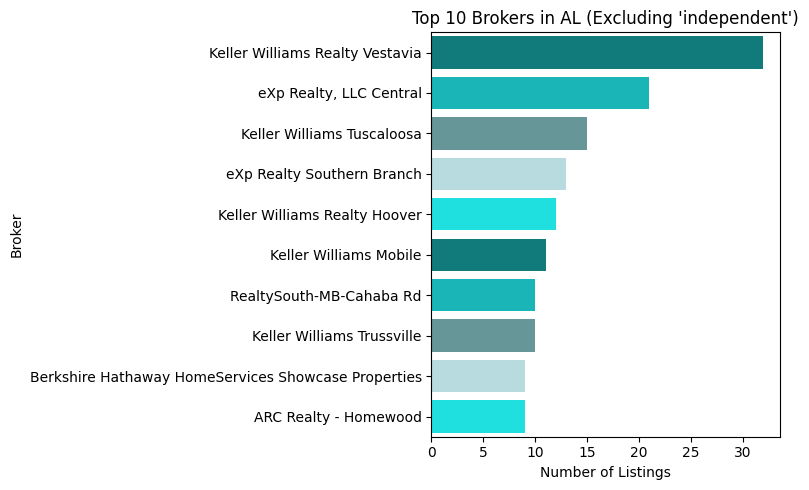

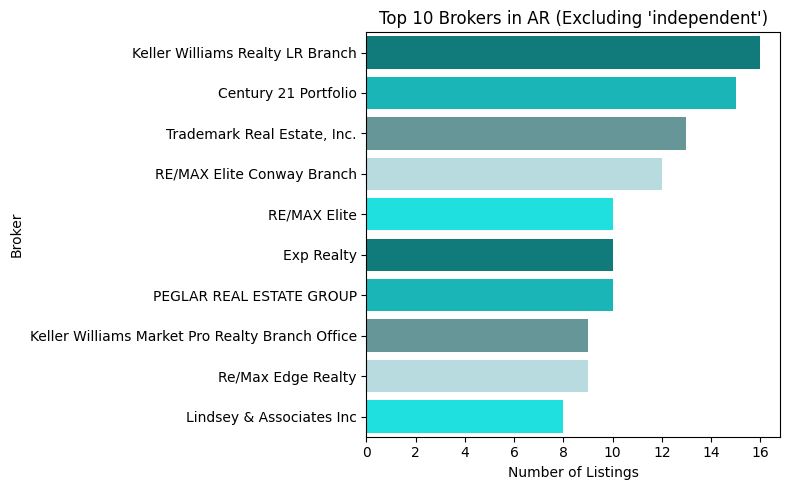

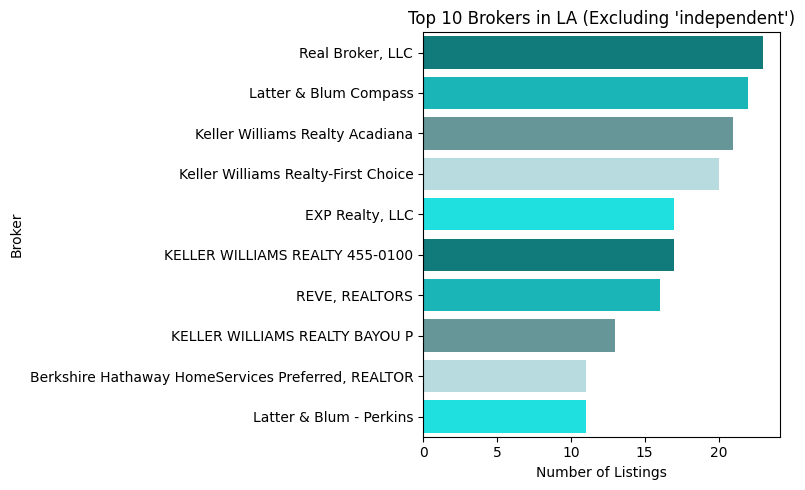

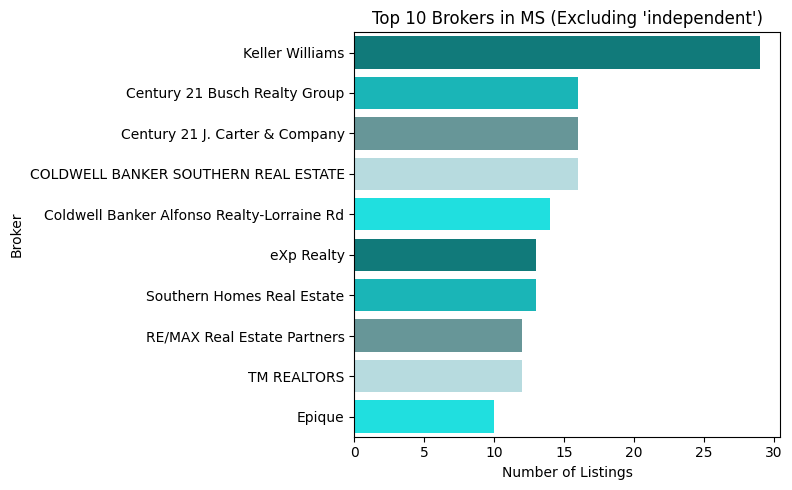

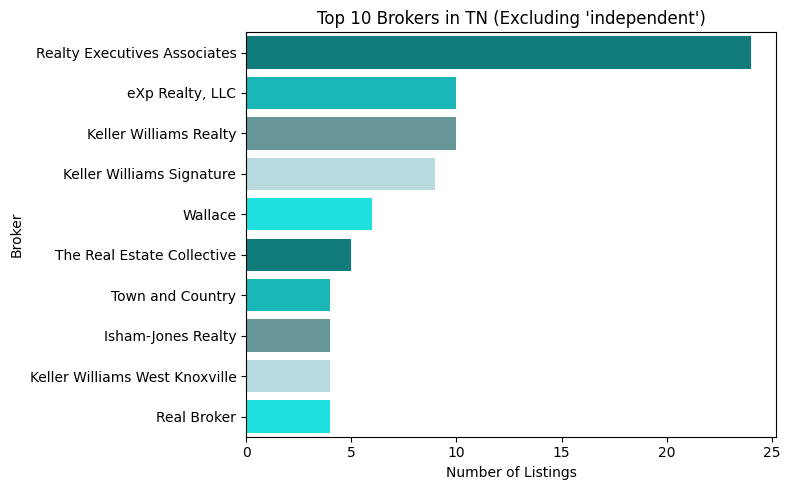

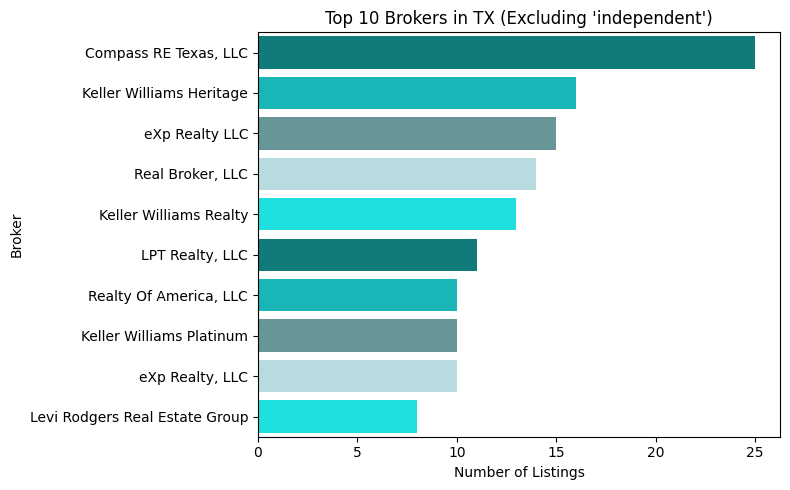

In [91]:
# Top 10 brokers in each state after independent listings!
broker_counts = new_data.groupby(['state', 'brokerName']).size().reset_index(name='count')

broker_counts_filtered = broker_counts[broker_counts['brokerName'] != 'independent']

states = broker_counts_filtered['state'].unique()

for state in states:
    state_data = broker_counts_filtered[broker_counts_filtered['state'] == state]
    # Sort brokers by count (descending) and select the top 10
    state_data = state_data.sort_values(by='count', ascending=False).iloc[:10]
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='count', y='brokerName', data=state_data, palette= palette_2)
    plt.title(f"Top 10 Brokers in {state} (Excluding 'independent')")
    plt.xlabel("Number of Listings")
    plt.ylabel("Broker")
    plt.tight_layout()
    plt.show()

#### <span style="color:#1E90FF">Map the listings to reveal clusters of high or low-priced properties.</span>

In [92]:
# map the listings to reveal clusters of high or low-priced properties
df_cleaned = new_data.dropna(subset=['latitude', 'longitude', 'price'])

heat_data = [[row['latitude'], row['longitude'], row['price']] for _, row in df_cleaned.iterrows()]
map_center = [df_cleaned['latitude'].mean(), df_cleaned['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10, tiles="CartoDB dark_matter")

HeatMap(
    heat_data, 
    min_opacity=0.5,
    radius=15,
    blur=10,
    gradient={"0.4": 'blue', "0.65": 'lime', "1": 'red'}
).add_to(m)

m.save("pricing_trends_map.html")
m

#### <span style="color:#1E90FF">Are there differences in market dynamics (price per sqft, days on market) between urban versus rural areas within these states?</span>

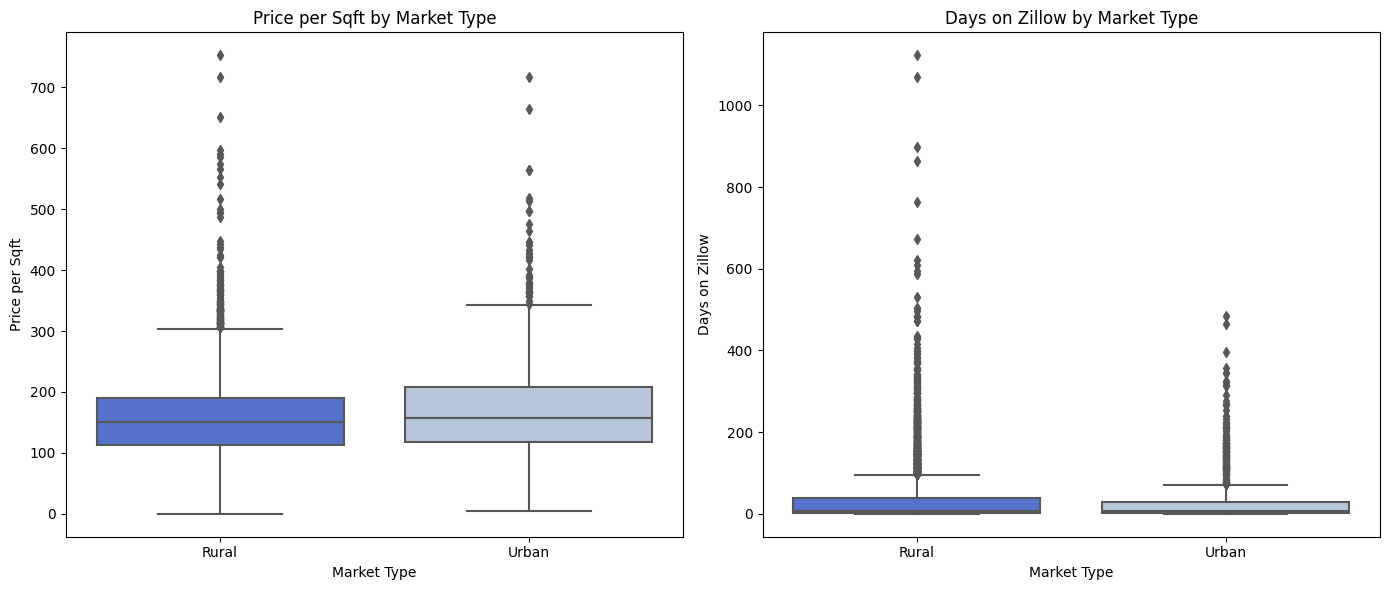

In [93]:
# are there differences in market dynamics (price per sqft, days on market) between urban versus rural areas within these states?
df_no_outliers['price_per_sqft'] = df_no_outliers['price'] / df_no_outliers['livingArea']

urban_cities = [
    # Tennessee (TN)
    'Nashville', 'Memphis', 'Knoxville', 'Chattanooga',
    # Arkansas (AR)
    'Little Rock', 'Springdale',
    # Alabama (AL)
    'Birmingham', 'Montgomery', 'Mobile',
    # Louisiana (LA)
    'New Orleans','Shreveport',
    # Mississippi (MS)
    'Jackson', 'Gulfport',
    # Texas (TX)
    'Houston', 'Dallas', 'San Antonio', 'Austin','El Paso'
]

df_no_outliers['market_type'] = df_no_outliers['city'].apply(lambda x: 'Urban' if x in urban_cities else 'Rural')

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df_no_outliers, x='market_type', y='price_per_sqft', ax=axs[0], palette= palette_1)
axs[0].set_title("Price per Sqft by Market Type")
axs[0].set_xlabel("Market Type")
axs[0].set_ylabel("Price per Sqft")

sns.boxplot(data=df_no_outliers, x='market_type', y='daysOnZillow', ax=axs[1], palette= palette_1)
axs[1].set_title("Days on Zillow by Market Type")
axs[1].set_xlabel("Market Type")
axs[1].set_ylabel("Days on Zillow")

plt.tight_layout()
plt.show()

---
### Observations:
* It seems like the strongest competetitor in the south is Keller Williams, Inc.
* We have EXP Realty, LLC, as a strong competetitor in Texas, Tennessee, and Alabama.
* Re/Max Holdings being the strongest competetitor after Keller Williams in Arkansas.
* Century 21 Real Estate is the strongest competetitor after Keller Williams in Mississippi.
* For the Geo Analysis i will leave it for another notebook!
* It seems like the Urban areas have only a slightly more expensive prices than thr Rural areas.
* Rurals areas tend to stay on Zillow just for a little bit more time before being sold.


---

<a id="1"></a>
# <p style="background-color:#0286ba;font-family:georgia,serif;color:#FFF8ED;font-size:150%;text-align:center;border-radius:10px 10px;">Insights and Findings</p>

___

<div style="text-align: center;">
  <img src="https://github.com/WillyWill143/Southern-housing-market/blob/main/2_Price-vs-Property-Features-What-Drives-Value.png?raw=true" alt="Findings 1" width="850">
</div>

---
<div style="text-align: center;">
  <img src="https://github.com/WillyWill143/Southern-housing-market/blob/main/3_Living-Area-Size-Distribution-Across-States.png?raw=true" alt="Findings 2" width="850">
</div>

---
<div style="text-align: center;">
  <img src="https://github.com/WillyWill143/Southern-housing-market/blob/main/4_Market-Dynamics-Days-on-Zillow-and-Broker-Presence.png?raw=true" alt="Findings 3" width="850">
</div>

___

<a id="1"></a>
# <p style="background-color:#0286ba; font-family: georgia, serif; color:#FFF8ED; font-size:200%; text-align:center; border-radius:10px 10px;">Thank You!<br>Upvote if you found useful!</p>